<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Intro-to-ML-models/blob/main/ml_logistic_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML: Logistic Regression-2

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# !gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

In [ ]:
!wget https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m -O churn_logistic.csv

--2024-02-02 18:39:05--  https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
Resolving drive.google.com (drive.google.com)... 172.217.203.113, 172.217.203.100, 172.217.203.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m [following]
--2024-02-02 18:39:05--  https://drive.usercontent.google.com/download?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.139.132, 2607:f8b0:400c:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.139.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494353 (483K) [application/octet-stream]
Saving to: ‘churn_logistic.csv’

churn_logistic.csv  100%[===================>] 482.77K  --.-KB/s    in 0.004s  

2024-02-02 18:39:06 (120

In [ ]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


| Records | Features |
| --- | --- |
| 5700 | 21 |

| Id | Features | Description |
| --- | --- | --- |
| 01 | state | 2-letter code of the US state of customer residence |
| 02 | account_length | Number of months the customer has been with the current telco provider |
| 03 | area_code | string="area_code_AAA" where AAA = 3 digit area code |
| 04 | intl_plan | The customer has international plan |
| 05 | vmail_plan | The customer has voice mail plan |
| 06 | vmail_messages | Number of voice-mail messages |
| 07 | day_mins | Total minutes of day calls |
| 08 | day_calls | Total no of day calls |
| 09 | day_charge | Total charge of day calls |
| 10 | eve_mins | Total minutes of evening calls |
| 11 | eve_calls | Total no of evening calls |
| 12 | eve_charge | Total charge of evening calls |
| 13 | night_mins | Total minutes of night calls |
| 14 | night_calls | Total no of night calls |
| 15 | night_charge | Total charge of night calls |
| 16 | intl_mins | Total minutes of international calls |
| 17 | intl_calls | Total no of international calls |
| 18 | intl_charge | Total charge of international calls |
| 19 | customer_service_calls | Number of calls to customer service |
| 20 | phone | 10 digit number |
| 21 | churn | Customer churn - target variable |

In [ ]:
churn['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

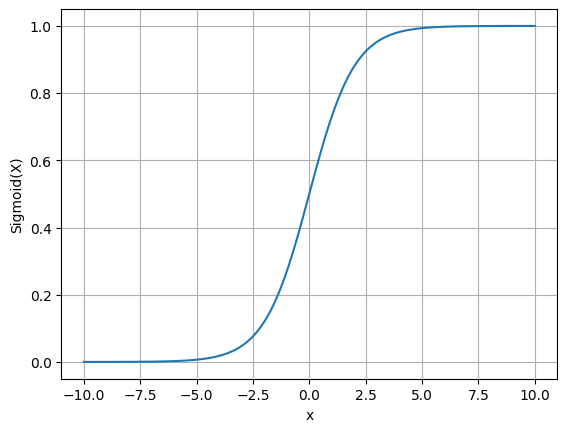

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.e**-x)
x = np.linspace(-10, 10, 100) # 100 equidistant points between -10 and 10
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()


In [ ]:
# Loss for a single point
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

In [ ]:
log_loss(y=1, y_hat=0.99)

0.01005033585350145

In [ ]:
log_loss(y=1, y_hat=0.09)

2.4079456086518722

In [ ]:
log_loss(y=0, y_hat=0.01)

0.01005033585350145

In [ ]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
y = np.array(y).reshape(len(y), 1) #Reshaping our data to (m,1) shape
X = churn[cols]
X.shape

(5700, 5)

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape, X_val.shape, X_test.shape

((3420, 5), (1140, 5), (1140, 5))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

print("coef = ",model.coef_)
print("intercept = ",model.intercept_)

coef =  [[0.6844725  0.29104522 0.13637423 0.79640697 0.0613349 ]]
intercept =  [-0.01215015]


In [ ]:
model.predict(X_train)


array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
model.predict_proba(X_train)


array([[0.729731  , 0.270269  ],
       [0.37779495, 0.62220505],
       [0.39764836, 0.60235164],
       ...,
       [0.47266367, 0.52733633],
       [0.34541253, 0.65458747],
       [0.25777343, 0.74222657]])

In [ ]:
def accuracy(y_true, y_pred):
  y_true = y_true.reshape(len(y_true))
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [ ]:
accuracy(y_train, model.predict(X_train))


0.7058479532163743

In [ ]:
accuracy(y_val, model.predict(X_val))


0.6982456140350877

In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
    scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = accuracy(y_train, scaled_lr.predict(X_train))
    val_score = accuracy(y_val, scaled_lr.predict(X_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

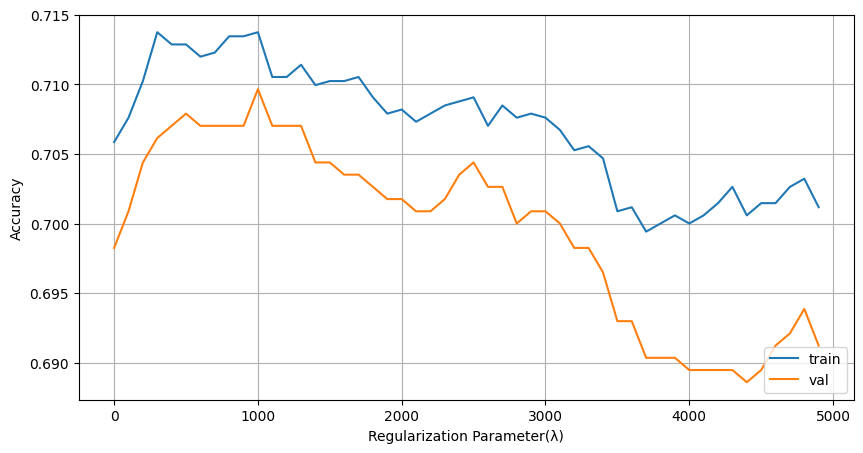

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
# c==1/λ
model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

print("Train acc = ",accuracy(y_train, model.predict(X_train)))


print("Test acc = ",accuracy(y_val, model.predict(X_val)))

Train acc =  0.7137426900584796
Test acc =  0.7096491228070175


In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

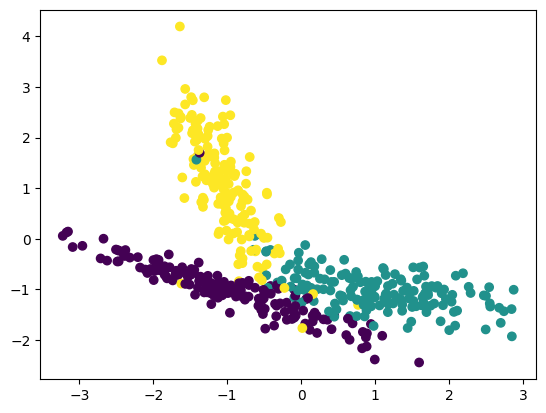

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

In [ ]:
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)


print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


In [ ]:
print("coef = ",model.coef_)
print("intercept = ",model.intercept_)
model.predict(X_train)

coef =  [[-2.94629438 -3.82603429]
 [ 3.12933217  0.65558364]
 [ 0.16283525  3.11202997]]
intercept =  [-4.40654445 -0.04582739  0.20207005]


array([2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2,
       2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1,
       2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1,
       0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 1, 2,
       0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1,
       0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1])

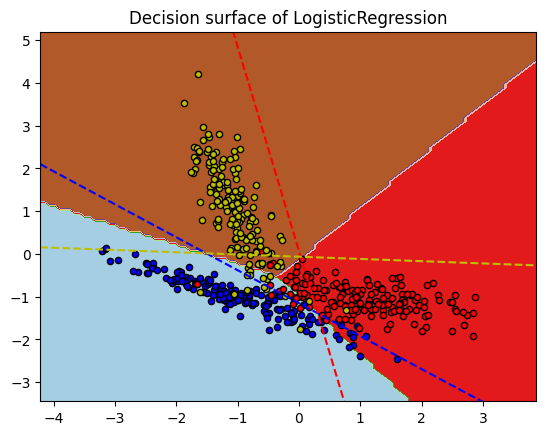

In [ ]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

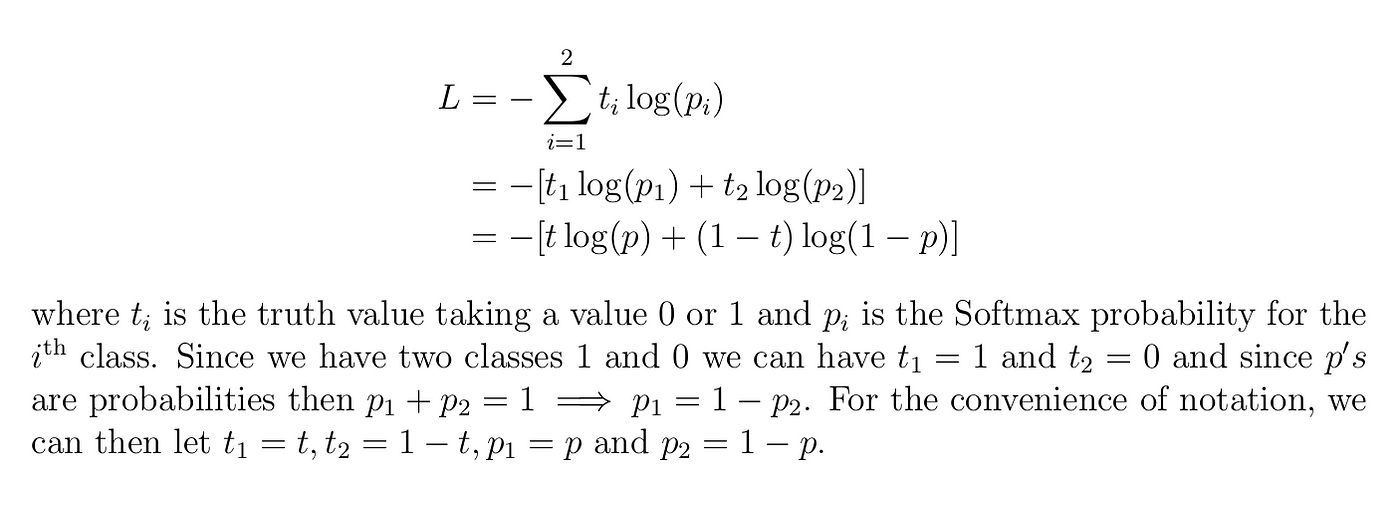